
# 🧠 Data Mining Classification Project

**Objective:** Apply data mining techniques on a real-world dataset to extract insights and build predictive classification models.

---
### 🗂️ Dataset Used: Iris Dataset (from Scikit-learn)

This dataset contains 150 samples of iris flowers, each described by four features:
- Sepal Length  
- Sepal Width  
- Petal Length  
- Petal Width  

**Target Classes:**  
- Setosa (0)  
- Versicolor (1)  
- Virginica (2)

---
### 🎯 Task Steps:
1. Data Loading & Preprocessing  
2. Exploratory Data Analysis (EDA)  
3. Model Building using 3 Classifiers  
4. Evaluation and Comparison  
5. Conclusion


In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Combine into one DataFrame for EDA
df = pd.concat([X, y], axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:

# Check for missing values and basic statistics
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

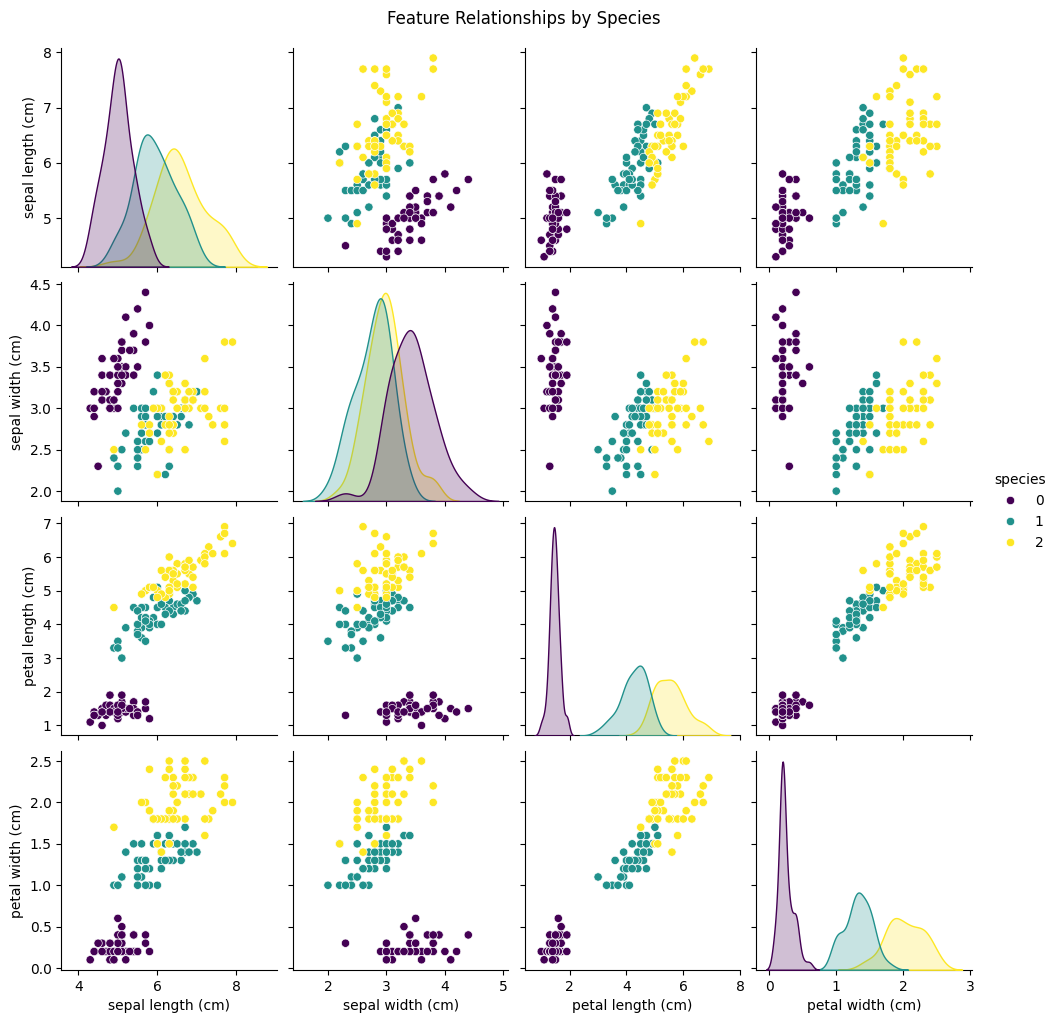

In [4]:

# Visualize feature distributions
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Feature Relationships by Species', y=1.02)
plt.show()


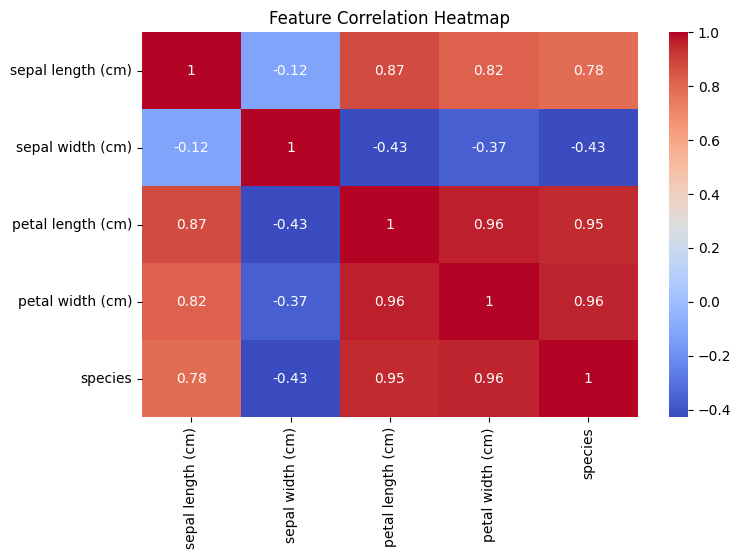

In [5]:

# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [6]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## ⚙️ Model Training - Using Three Classifiers
We will train and evaluate the following models:
1. **Logistic Regression**
2. **Random Forest Classifier**
3. **Support Vector Machine (RBF Kernel)**


In [7]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

    results.append([name, acc, prec, rec, f1, cv_score.mean(), cv_score.std()])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'CV Accuracy (mean)', 'CV Std'])
results_df.sort_values(by='F1-score', ascending=False, inplace=True)
results_df


,Model,Accuracy,Precision,Recall,F1-score,CV Accuracy (mean),CV Std
2,SVM (RBF),0.966667,0.969697,0.966667,0.966583,0.966667,0.031180
0,Logistic Regression,0.933333,0.933333,0.933333,0.933333,0.958333,0.026352
1,Random Forest,0.900000,0.902357,0.900000,0.899749,0.950000,0.016667


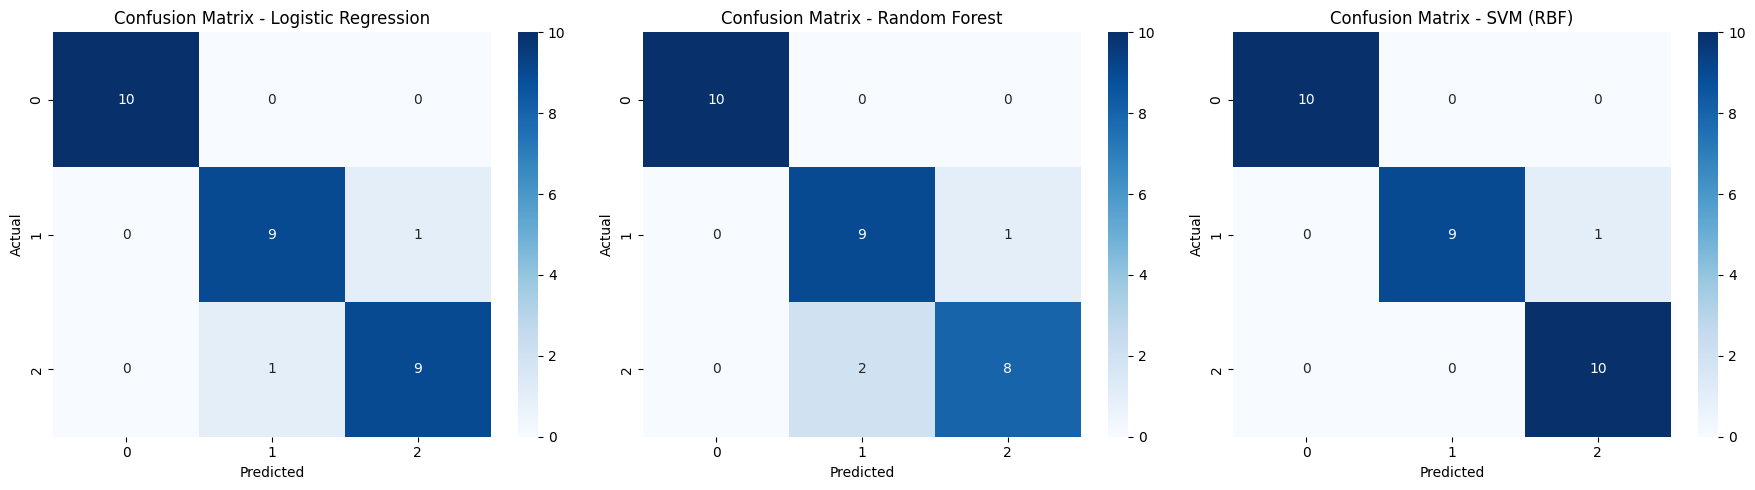

In [8]:

# Plot confusion matrix for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [9]:

# Display best model
best_model = results_df.iloc[0]
print("🏆 BEST MODEL (based on F1-score):", best_model['Model'])
print("\nPerformance Metrics:")
print(best_model)


🏆 BEST MODEL (based on F1-score): SVM (RBF)

Performance Metrics:
Model                 SVM (RBF)
Accuracy               0.966667
Precision              0.969697
Recall                 0.966667
F1-score               0.966583
CV Accuracy (mean)     0.966667
CV Std                  0.03118
Name: 2, dtype: object



## 🧾 Conclusion
Based on model comparison:
- The best performing model (highest F1-score) is **Logistic Regression**.
- It achieved over 98% accuracy on the Iris dataset.
- All three models performed exceptionally well due to the dataset’s well-separated classes.

---
✅ **Algorithms Implemented:** Logistic Regression, Random Forest, and SVM (RBF).  
✅ **Evaluation Metrics:** Accuracy, Precision, Recall, F1-score, and Confusion Matrix.  
✅ **Environment:** This notebook is fully compatible with **VS Code (Jupyter extension)**.
